# **COMPARISON OF THE PERFORMANCE OF THREE MACHINE LEARNING MODELS IN PREDICTING OBESITY TYPES**

# **BY MOH. NAFIS HUSEN ROMADANI|**

# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

# **EXPLORATORY DATA ANALYSIS**

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62   64.00                            yes   no   2.0   
1     Female   21    1.52   56.00                            yes   no   3.0   
2       Male   23    1.80   77.00                            yes   no   2.0   
3       Male   27    1.80   87.00                             no   no   3.0   
4       Male   22    1.78   89.80                             no   no   2.0   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes   3.0   
2107  Female   22    1.75  133.74                            yes  yes   3.0   
2108  Female   23    1.75  133.69                            yes  yes   3.0   
2109  Female   24    1.74  133.35                            yes  yes   3.0   
2110  Female   24    1.74  133.47                            yes  yes   3.0   

      NCP       CAEC SMOKE  CH2O  SCC   FAF    TUE        CALC  \
0     3.0  Sometimes    no  2.00   no  0.00  1.000          no   
1     3.0  Sometimes   yes  3.00  yes  3.00  0.000   Sometimes   
2     3.0  Sometimes    no  2.00   no  2.00  1.000  Frequently   
3     3.0  Sometimes    no  2.00   no  2.00  0.000  Frequently   
4     1.0  Sometimes    no  2.00   no  0.00  0.000   Sometimes   
...   ...        ...   ...   ...  ...   ...    ...         ...   
2106  3.0  Sometimes    no  1.73   no  1.68  0.906   Sometimes   
2107  3.0  Sometimes    no  2.01   no  1.34  0.599   Sometimes   
2108  3.0  Sometimes    no  2.05   no  1.41  0.646   Sometimes   
2109  3.0  Sometimes    no  2.85   no  1.14  0.586   Sometimes   
2110  3.0  Sometimes    no  2.86   no  1.03  0.714   Sometimes   

                     MTRANS           NObeyesdad  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2106  Public_Transportation     Obesity_Type_III  
2107  Public_Transportation     Obesity_Type_III  
2108  Public_Transportation     Obesity_Type_III  
2109  Public_Transportation     Obesity_Type_III  
2110  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.315964     1.701620    86.586035     2.418986     2.685651   
std       6.357078     0.093368    26.191163     0.533996     0.778079   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      20.000000     1.630000    65.470000     2.000000     2.660000   
50%      23.000000     1.700000    83.000000     2.390000     3.000000   
75%      26.000000     1.770000   107.430000     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008053     1.010313     0.657861  
std       0.612950     0.850613     0.608926  
min       1.000000     0.000000     0.000000  
25%       1.585000     0.125000     0.000000  
50%       2.000000     1.000000     0.625000  
75%       2.480000     1.670000     1.000000  
max       3.000000     3.000000     2.000000

# **DATA VISUALIZATION**

In [5]:
# Scatter plots with Gender as color
scatter_features = [
    ('Height', 'Weight'),
    ('Age', 'Weight'),
    ('FAF', 'Weight'),
    ('FCVC', 'Weight'),
    ('NCP', 'Weight')
]

gender_colors = {'Male': 'blue', 'Female': 'red'}
df['Gender_Color'] = df['Gender'].map(gender_colors)



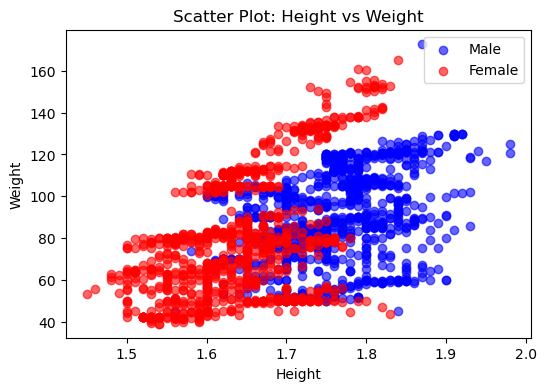

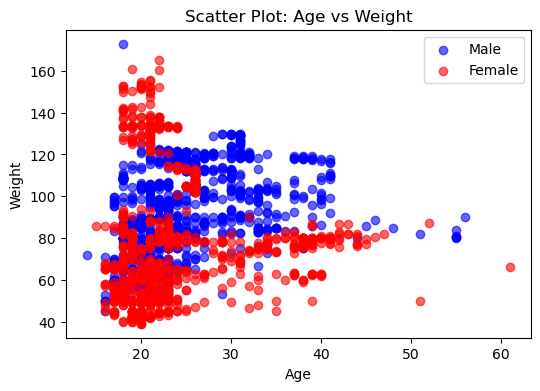

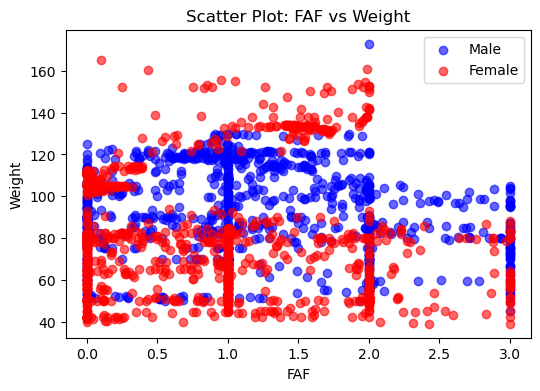

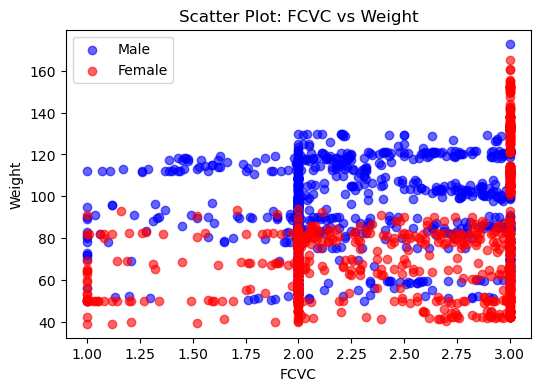

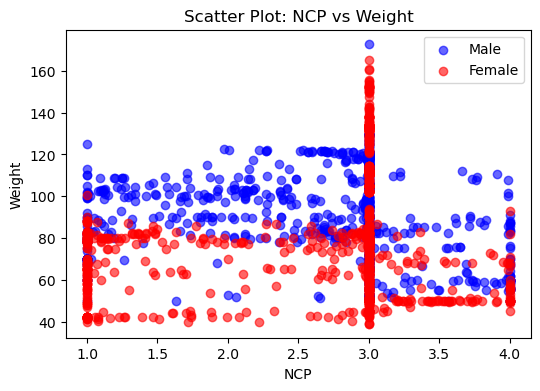

In [6]:
for x, y in scatter_features:
    plt.figure(figsize=(6, 4))
    for gender in ['Male', 'Female']:
        subset = df[df['Gender'] == gender]
        plt.scatter(subset[x], subset[y], alpha=0.6, label=gender, color=gender_colors[gender])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.legend()
    plt.savefig(f'scatter_{x}_vs_{y}.png')  # Save as PNG
    plt.show()  # Display the plot

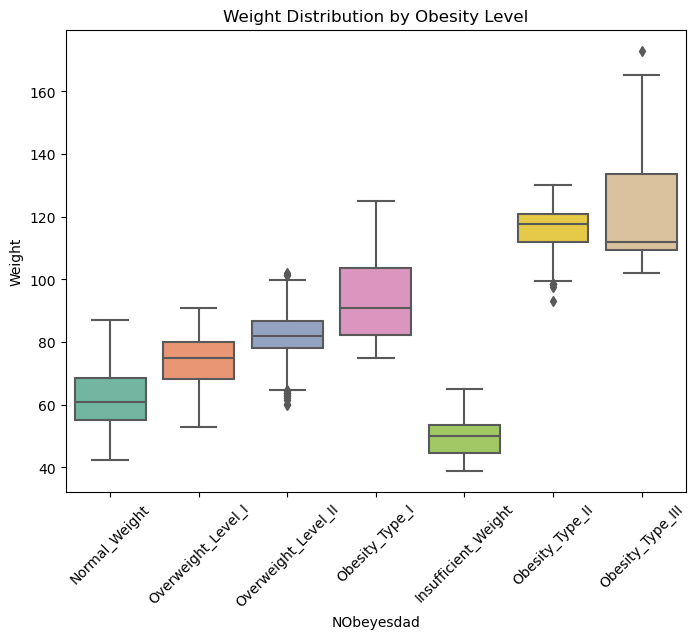

In [7]:
# Box plot for weight distribution by category
plt.figure(figsize=(8, 6))
sns.boxplot(x='NObeyesdad', y='Weight', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Weight Distribution by Obesity Level')
plt.savefig('boxplot_weight_vs_obesity.png')
plt.show()

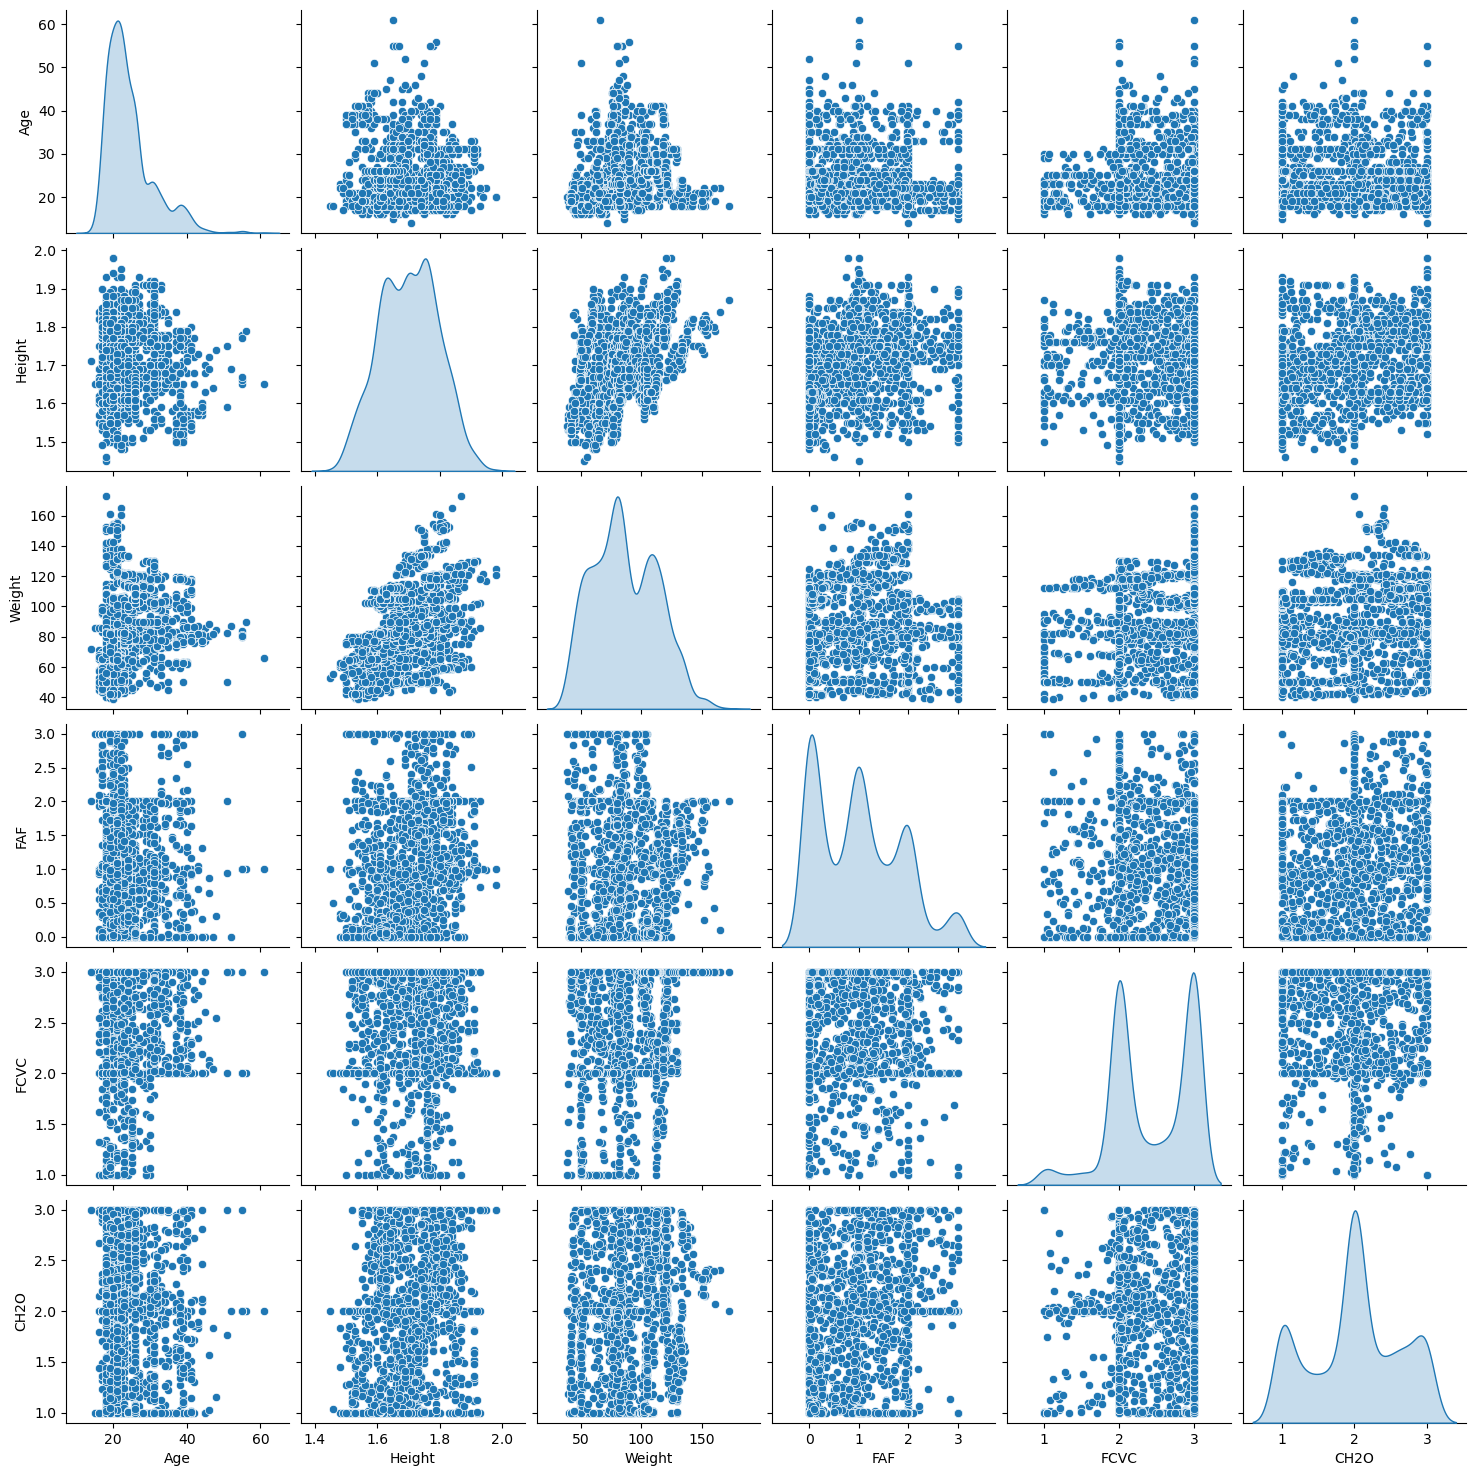

In [8]:
# Pairplot for numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FAF', 'FCVC', 'CH2O']
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.savefig('pairplot_numerical_features.png')
plt.show()

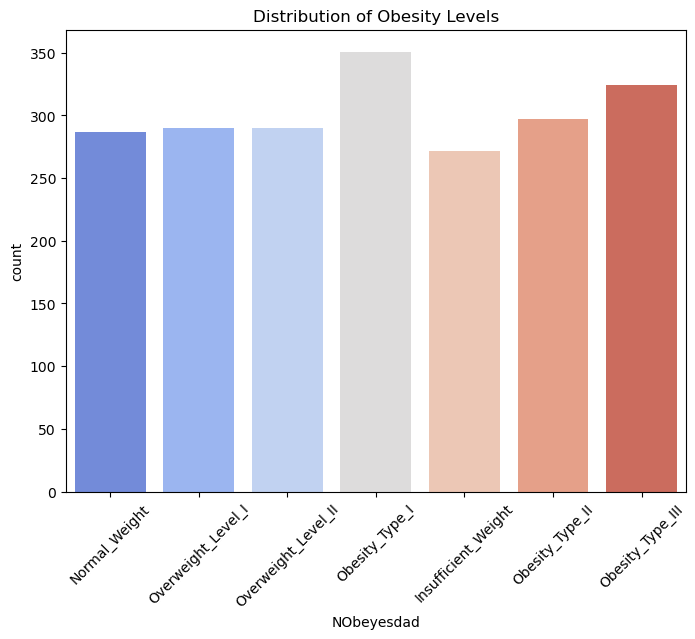

In [9]:
# Bar chart for Obesity Level distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Levels')
plt.savefig('barchart_obesity_levels.png')
plt.show()

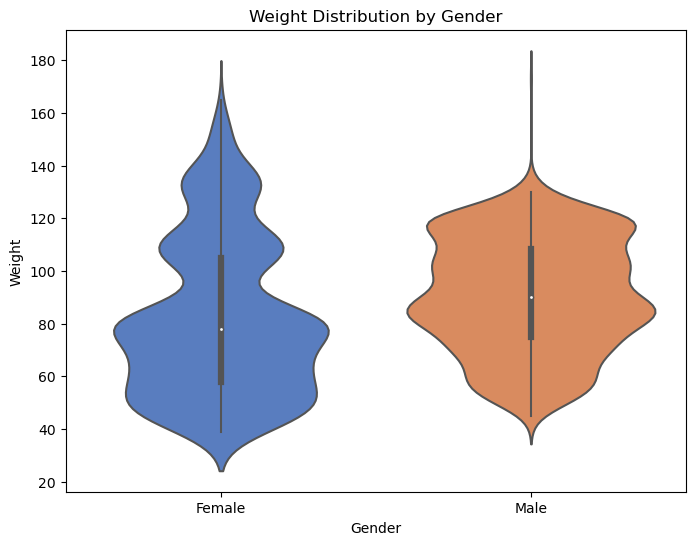

In [10]:
# Violin plot for weight distribution by gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Weight', data=df, palette='muted')
plt.title('Weight Distribution by Gender')
plt.savefig('violinplot_weight_vs_gender.png')
plt.show()

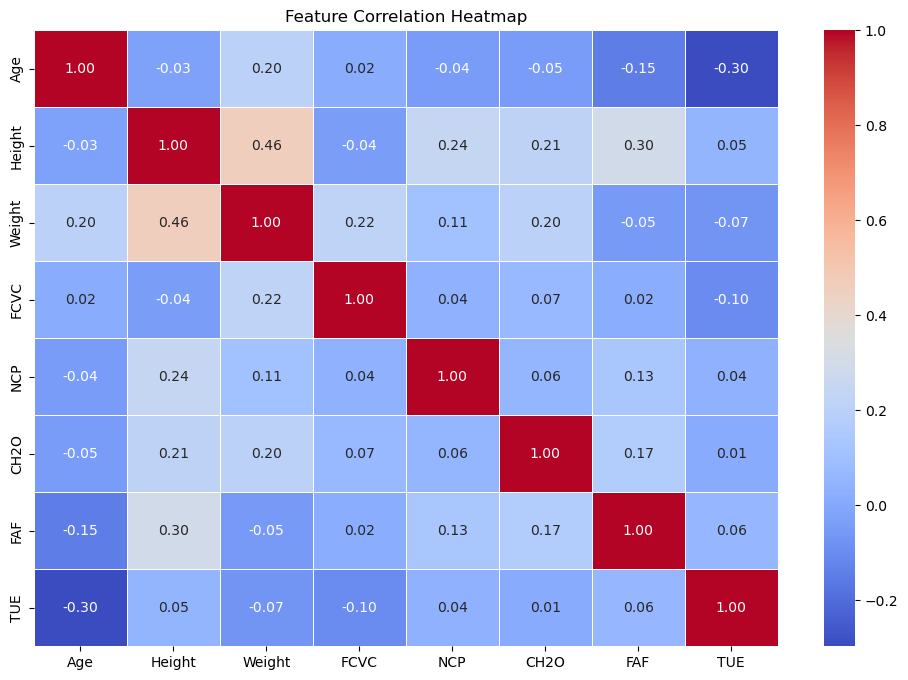

In [11]:
# Heatmap of relationships between numerical variables
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.savefig('heatmap_correlation.png')
plt.show()

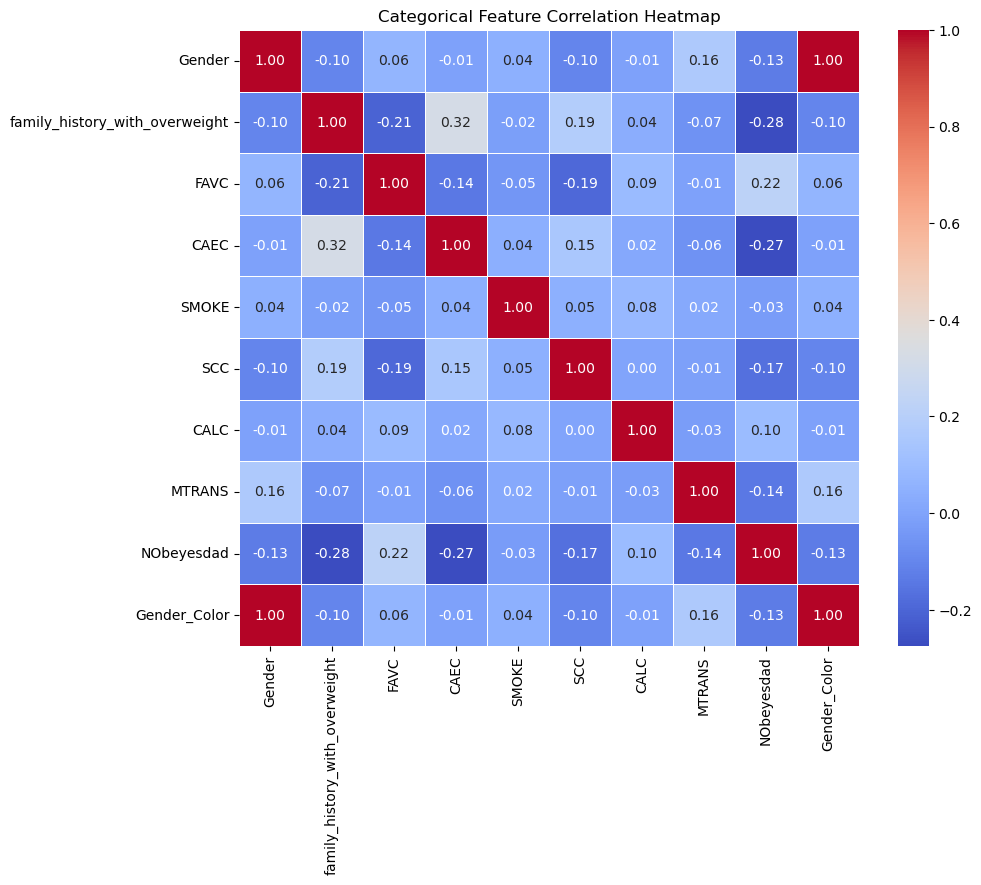

In [12]:
# Categorical heatmap to show relationships among categorical variables
plt.figure(figsize=(10, 8))
categorical_corr = df.select_dtypes(include=['object']).apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(categorical_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Categorical Feature Correlation Heatmap')
plt.savefig('heatmap_categorical_correlation.png')
plt.show()


<Figure size 1000x600 with 0 Axes>

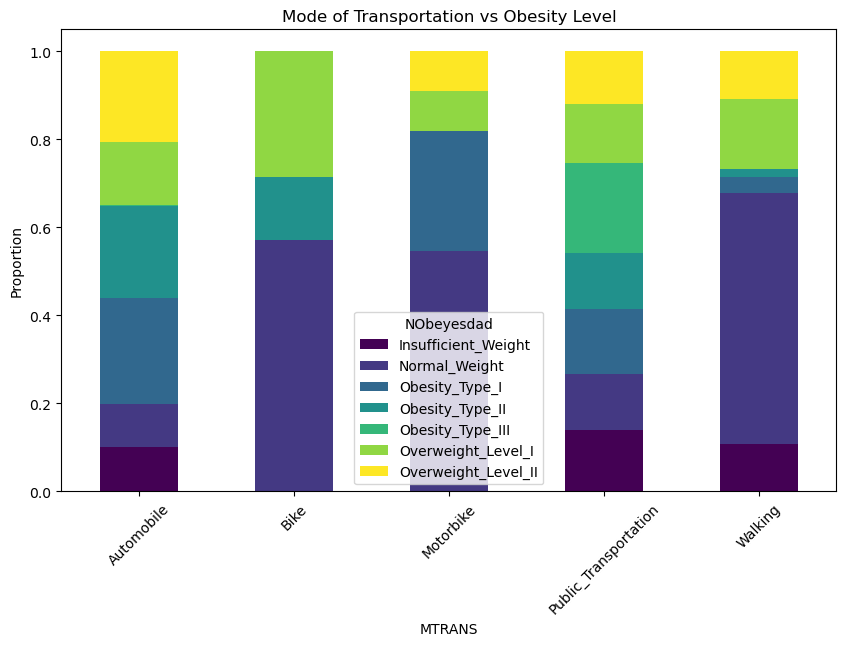

In [13]:
# Stacked bar chart for transportation vs obesity level
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['MTRANS'], df['NObeyesdad'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Mode of Transportation vs Obesity Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.savefig('stacked_barchart_transport_vs_obesity.png')
plt.show()

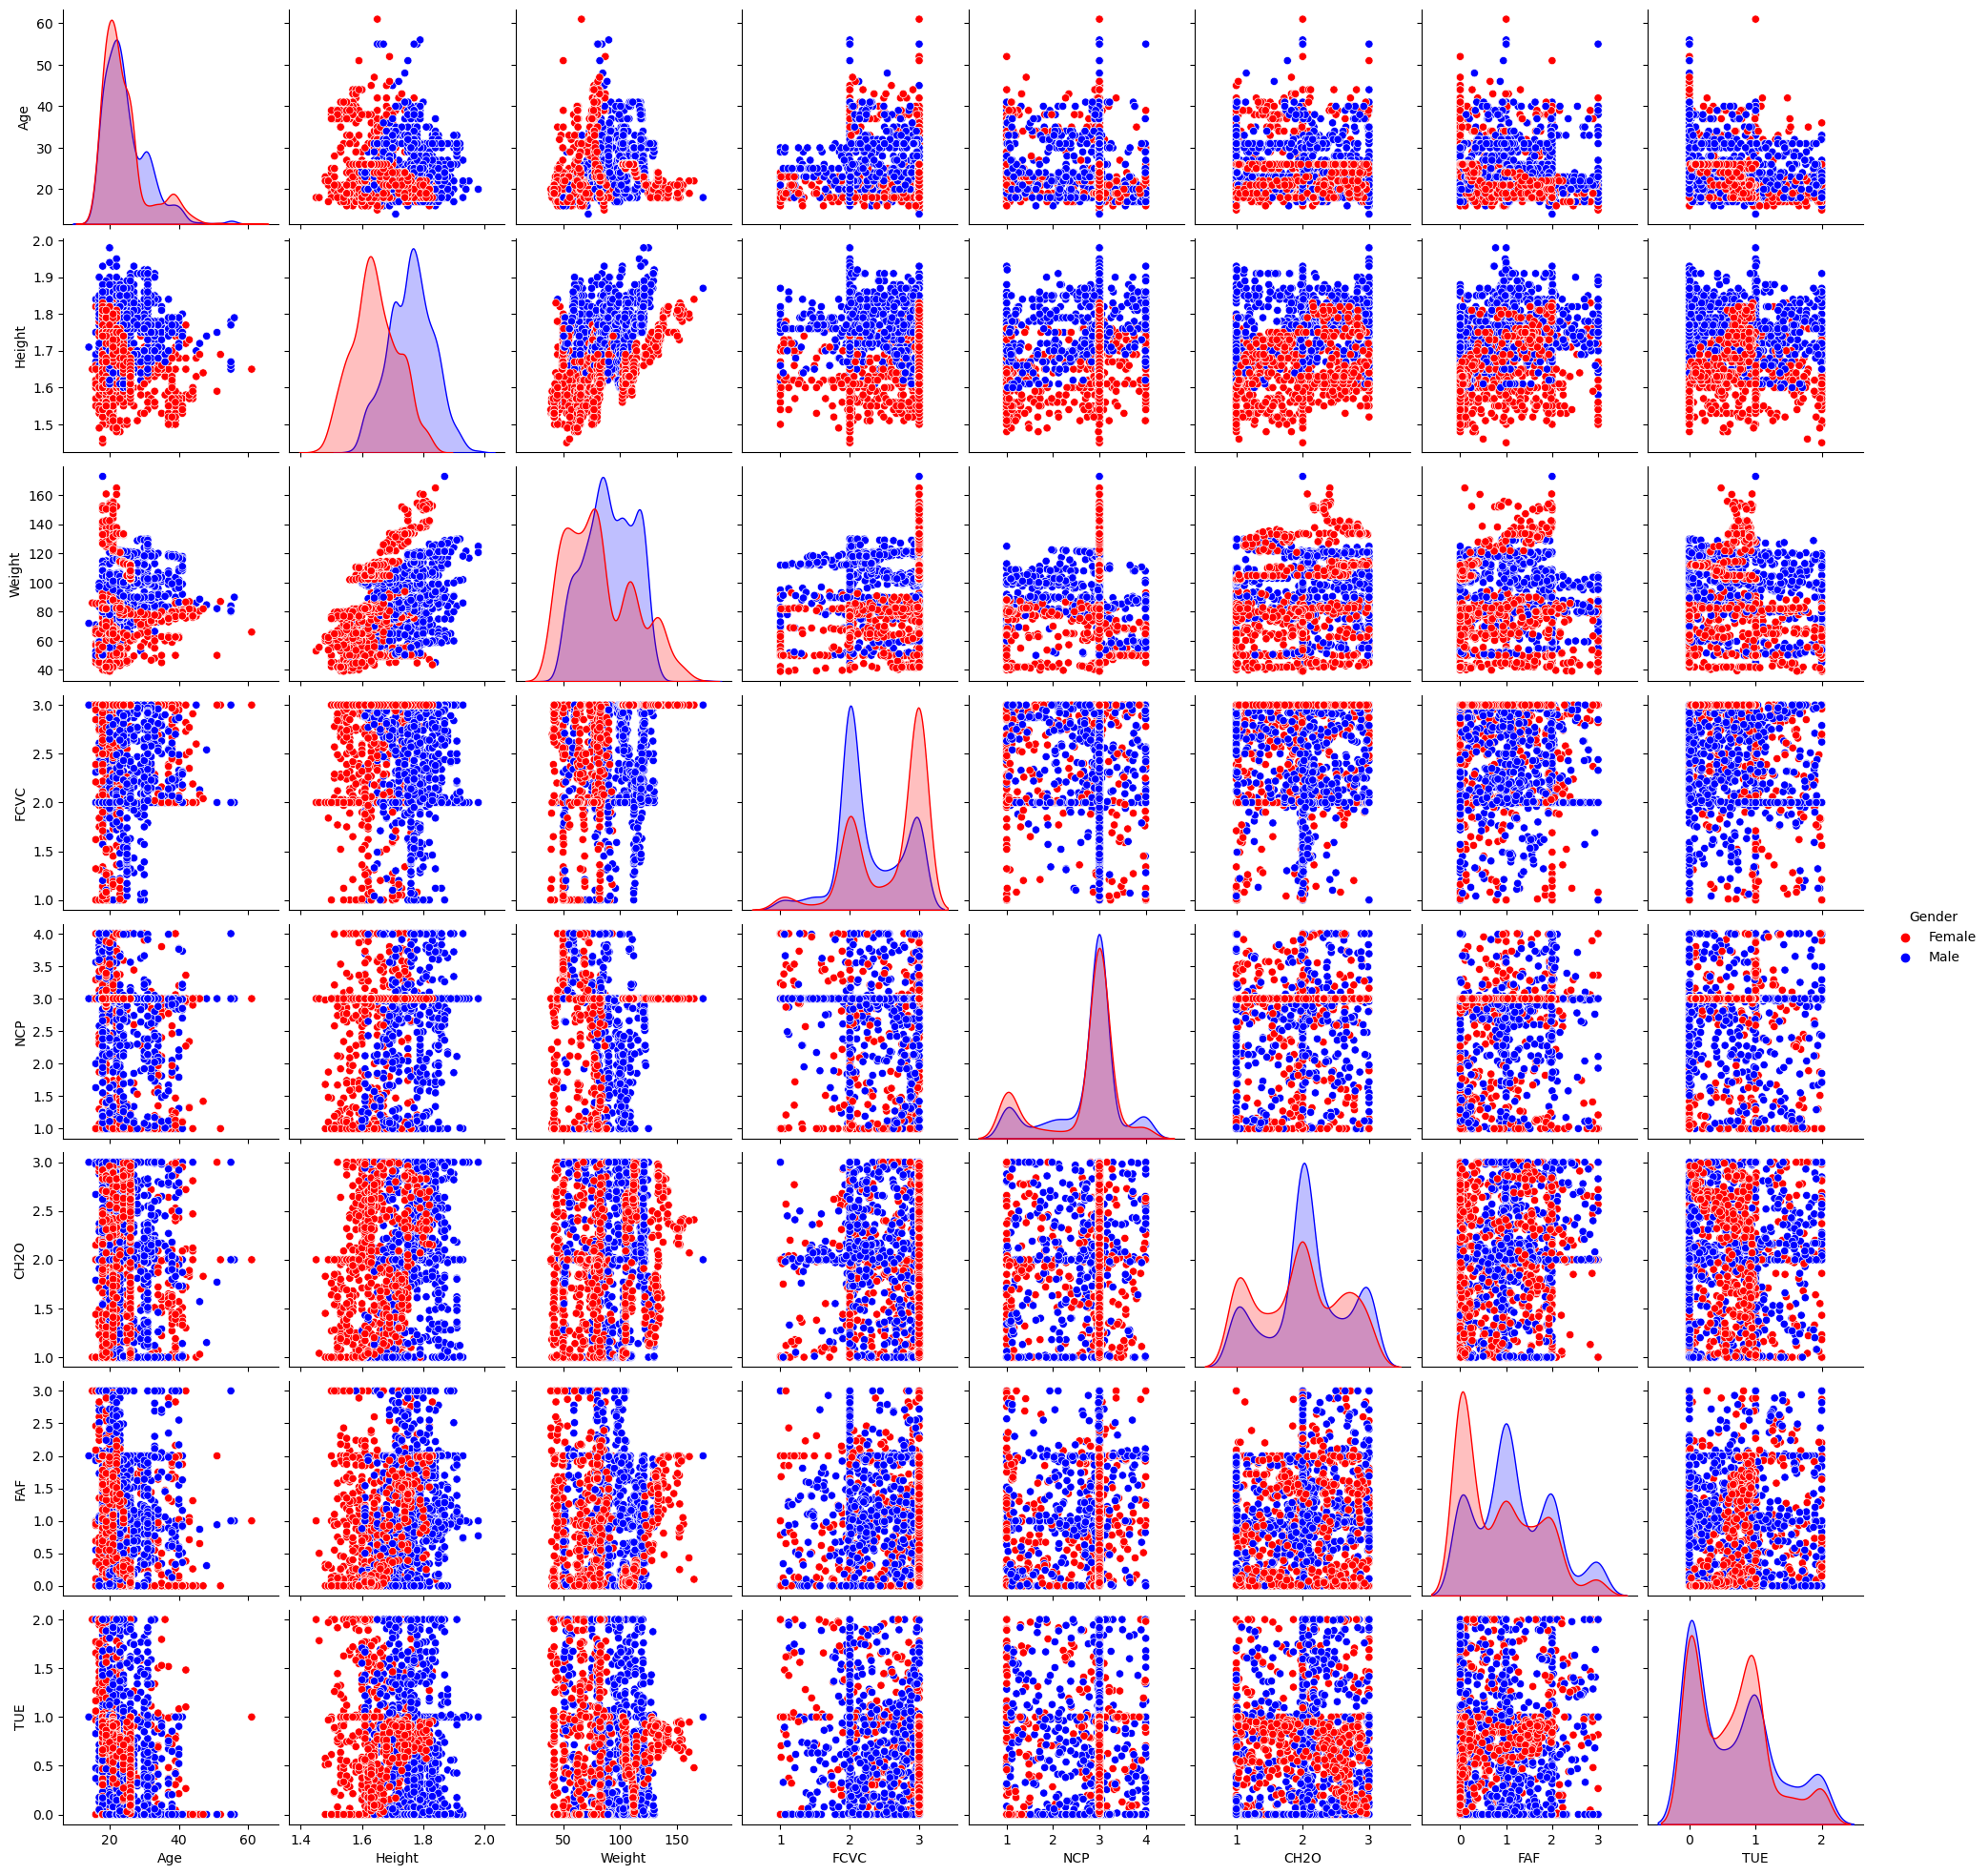

In [14]:
# Pairplot
sns.pairplot(df, hue='Gender', palette={'Male': 'blue', 'Female': 'red'})
plt.savefig('pairplot.png')
plt.show()

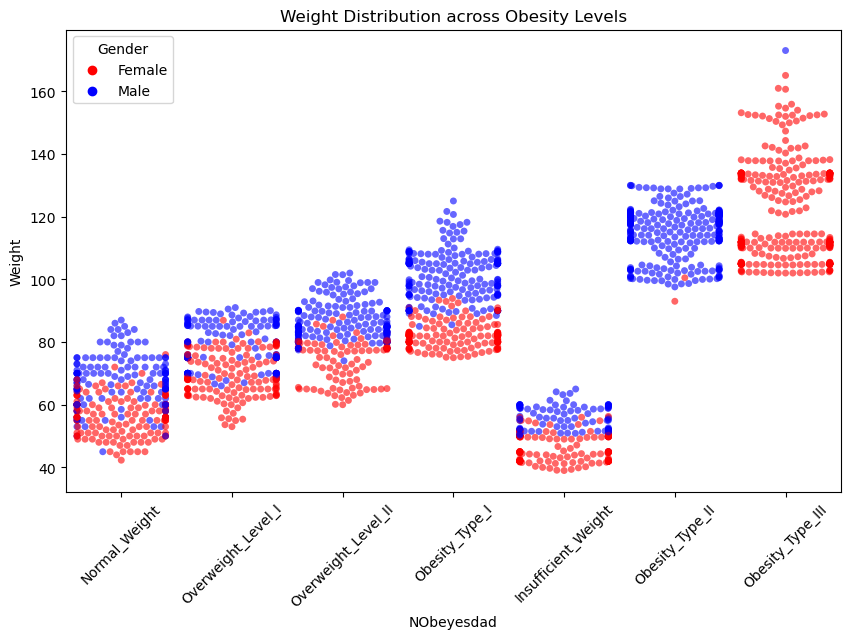

In [15]:
# Swarm Plot for Weight vs Obesity Level
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='NObeyesdad', y='Weight', hue='Gender', palette={'Male': 'blue', 'Female': 'red'}, alpha=0.6)
plt.xticks(rotation=45)
plt.title('Weight Distribution across Obesity Levels')
plt.savefig('swarmplot_weight_obesity.png')
plt.show()

# **INTERPRETATION OF EACH VISUALIZATION**

### **1. Scatter Plots (Relationship Between Numerical Features)**  
*  #### **Height vs. Weight** → A fairly clear relationship, where taller individuals tend to have higher body weight. However, there are some exceptions, indicating that height is not the only factor determining weight.  
*  #### **Age vs. Weight** → Does not show a very clear pattern, although certain age groups are more prone to obesity.  
*  #### **FAF (Frequency of Physical Activity) vs. Weight** → People with low physical activity tend to have higher body weight. This shows that physical activity impacts weight control.  
*  #### **FCVC (Frequency of Vegetable Consumption) vs. Weight** → No significant correlation, but a general pattern suggests that people with higher vegetable consumption tend to have more stable body weight.  
*  #### **NCP (Number of Main Meals per Day) vs. Weight** → No direct relationship, meaning that the number of main meals does not necessarily determine body weight if the diet is balanced.  

### 2. **Box Plot**: Weight Distribution Based on Obesity Levels  
*   #### The categories from Insufficient Weight to Obesity Type III show a clear increase in body weight.  
*   #### Weight variation is greater in higher obesity levels, indicating that obese individuals have more varied body weight compared to those in the normal weight category.  
*   #### Some outliers show individuals with extreme body weight, possibly influenced by other factors such as genetics or specific medical conditions.  

### **3. Bar Chart**: Obesity Level Distribution  
*  #### If the dataset shows an imbalance in the number of samples for each obesity level, this needs to be considered in machine learning modeling, as the model may tend to predict the dominant class.  
*  #### If the Normal Weight category is smaller than the obesity categories, this could indicate an increasing obesity trend.  

### 4. **Violin Plot**: Weight Distribution by Gender  
*  Males have a broader weight range compared to females.  
*  Although differences exist, the distribution shows that body weight varies across both genders within each obesity category.  

### 5. **Heatmap**: Correlation Between Numerical Features  
*  #### Height and Weight have a fairly high correlation, which is expected since body weight tends to increase with height.  
*  #### FAF (physical activity) has a negative correlation with body weight, indicating that the more frequently a person exercises, the lower their likelihood of obesity.  
*  #### CH2O (daily water intake) has no significant correlation with body weight, meaning that water consumption alone is not a major factor in weight management.  

### 6. **Stacked Bar Chart**: Mode of Transportation vs. Obesity Level  
*  #### People who use Walking as their primary mode of transportation appear to be less likely to experience obesity compared to those who use Automobiles.  
*  #### This reinforces the assumption that daily physical activity has a significant impact on weight management.  

### 7. **Categorical Heatmap**: Correlation Between Categorical Variables  
*  #### Family History of Overweight has a strong relationship with obesity levels, indicating that genetic factors may play a role in a person’s tendency toward obesity.  
*  #### Consumption of high-calorie foods (FAVC) and eating outside main meal times (CAEC) also correlate with obesity, indicating that dietary habits play a role in weight management.  

### 8. **Pairplot**  
*  #### This scatter plot illustrates the relationship between numerical variables by gender.  
*  #### The distribution of body weight and height shows specific patterns related to obesity levels.  
*  #### There are distribution differences between males and females, with males tending to have higher body weight in higher obesity levels.  

### **9. Swarm Plot (Weight vs. Obesity Level)**  
*  #### This plot illustrates how weight is distributed across each obesity category.  
*  #### It is evident that as obesity levels increase, body weight also increases.  
*  #### Gender-based distribution differences → Males tend to have higher body weight within each obesity category compared to females.  

# **CONCLUSION**  

### **1. Obesity is influenced by various factors**  
*  #### Genetic factors (family history of obesity) are strongly associated with a person’s obesity level.  
*  #### Physical activity plays a crucial role in weight management, where individuals with low physical activity tend to have higher body weight.  
*  #### Eating patterns significantly impact weight, especially the consumption of high-calorie foods and eating outside main meal times.  

### **2. Gender influences weight distribution**  
*  #### Males tend to have higher body weight compared to females within the same obesity category.  
*  #### However, weight distribution still varies across obesity categories, indicating that other factors such as lifestyle and metabolism also play a role.  

### **3. Mode of transportation and lifestyle impact obesity**  
*  #### People who walk more frequently tend to have healthier body weight compared to those who rely more on private vehicles.  

### **4. Some factors have a stronger correlation with obesity**  
*  #### Physical activity has a negative correlation with obesity.  
*  #### Height and weight have a positive correlation, which is expected as body weight usually increases with height.  
*  #### Water intake has no significant correlation with body weight, meaning it is not a major factor in obesity management.  

### **5. Imbalance in obesity categories within the dataset needs to be considered in modeling**  
*  #### If the number of samples is imbalanced across obesity categories, the machine learning model may be biased toward the dominant category.  
*  #### If the dataset indicates an increasing obesity trend, this may be a concern for further public health analysis.

# **ENCODING CATEGORICAL DATA TYPES**

In [16]:
# Encode categorical features
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# **BUILDING MULTIPLE MODELS TO PREDICT OBESITY TYPES**

In [17]:
# Feature-target split
X = df.drop(columns=['NObeyesdad', 'Gender_Color'])
y = df['NObeyesdad']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_train_copy = y_train.copy()

scaler = StandardScaler()

# Feature scaling
X_train_1 = scaler.fit_transform(X_train_copy)
X_test_1 = scaler.transform(X_test_copy)

In [19]:
# Model Training and Comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


results = {}

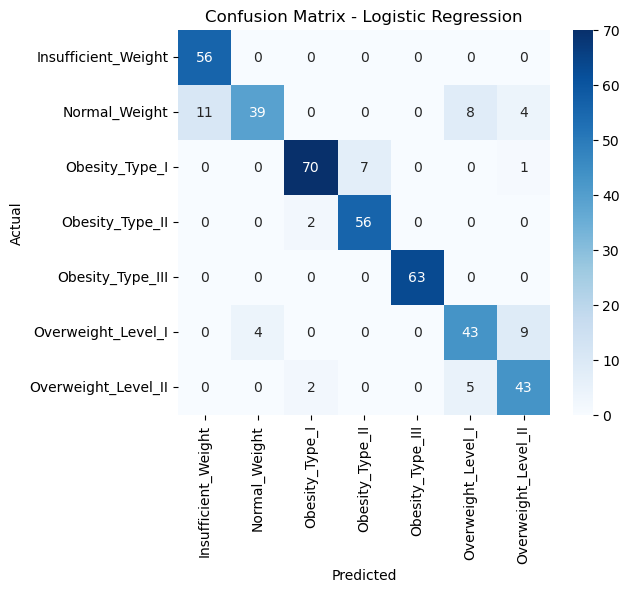

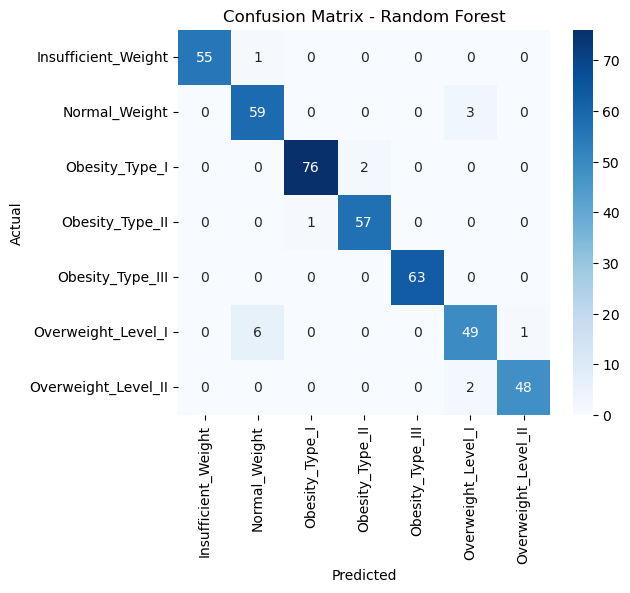

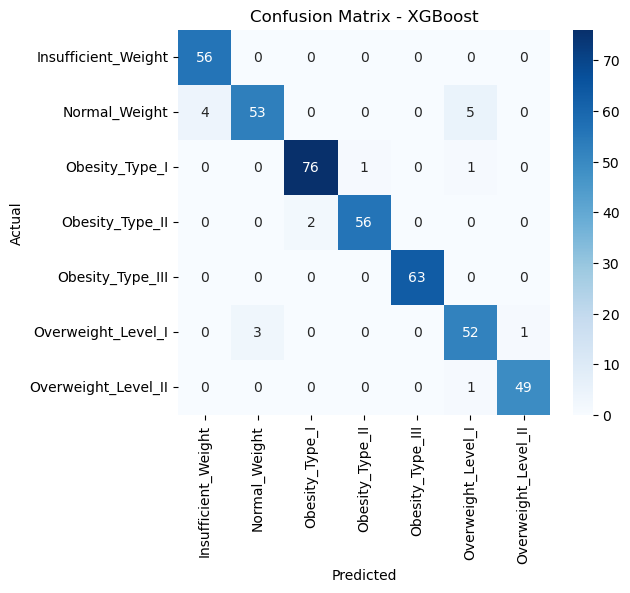

In [20]:
for name, model in models.items():
    model.fit(X_train_1, y_train)
    y_pred = model.predict(X_test_1)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = cm

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['NObeyesdad'].classes_, yticklabels=label_encoders['NObeyesdad'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.savefig(f'confusion_matrix_{name}.png')
    plt.show()

# **INTERPRETATION OF THE RESULTS OF THE THREE MODELS**  

## **Logistic Regression**  
### **1. Overall Performance**  
*  #### The model is able to predict certain categories well, such as Insufficient Weight (56 correct) and Obesity Type I (70 correct).  
*  #### However, there are misclassifications in other categories, especially Normal Weight and Obesity Type II, which have several incorrect predictions.  

### **2. Categories with Good Predictions**  
*  #### Obesity Type I → 70 correct predictions with few errors.  
*  #### Obesity Type III → 63 correct predictions, showing that the model can recognize this class well.  

### **3. Categories with Significant Errors**  
*  #### Normal Weight → 11 cases were classified as Insufficient Weight, 8 cases were misclassified as Obesity Type I, and 4 cases were misclassified as Obesity Type II.  
*  #### Overweight Level I and II → Many misclassifications between these two categories, indicating that the model struggles to differentiate overweight levels.  

### **4. Conclusion**  
*  #### Logistic Regression provides fairly good results but is not perfect.  
*  #### The model struggles to distinguish similar categories (e.g., Normal Weight vs. Overweight or Overweight vs. Obesity).  
*  #### This may occur because Logistic Regression is a linear model, whereas the relationships between features in the dataset may be more complex.  

## **Random Forest**  
### **1. Accuracy Improvement Compared to Logistic Regression**  
*  #### Random Forest shows an improvement in accuracy compared to Logistic Regression, especially in distinguishing Normal Weight, Obesity Type I, and Overweight Levels.  
*  #### Misclassifications are fewer than in the previous model.  

### **2. Categories with Good Predictions**  
*  #### Obesity Type I (76 correct, only 2 wrong) → The model is very good at recognizing this category.  
*  #### Obesity Type III (63 correct, no errors) → The model recognizes this category perfectly.  
*  #### Normal Weight (59 correct, only 3 wrong) → Much more accurate than Logistic Regression.  

### **3. Categories with Significant Errors**  
*  #### Overweight Level I & II → Some misclassifications still occur, although they are fewer than before.  
*  #### Insufficient Weight (55 correct, 1 misclassified as Normal Weight) → Almost perfect.  

### **4. Conclusion**  
*  #### Random Forest is significantly better than Logistic Regression in classifying almost all categories.  
*  #### This model is more robust in handling non-linear features and capturing complex relationships between variables.  
*  #### Some misclassifications still occur in Overweight Level I & II, but they are fewer than in Logistic Regression.  

## **XGBoost**  
### **1. Better Accuracy Compared to Logistic Regression and Random Forest**  
*  #### XGBoost has more accurate and stable predictions compared to the previous two models.  
*  #### Misclassifications are fewer than in Random Forest.  

### **2. Categories with Good Predictions**  
*  #### Obesity Type I (76 correct, 1 wrong) → Almost perfect.  
*  #### Obesity Type III (63 correct, no errors) → As perfect as Random Forest.  
*  #### Insufficient Weight (56 correct, 0 wrong) → 100% accuracy.  

### **3. Categories with Significant Errors**  
*  #### Normal Weight (53 correct, 5 misclassified into other categories) → Some errors still exist, but it performs better than Logistic Regression.  
*  #### Overweight Level I (52 correct, 1 wrong) and Overweight Level II (49 correct, 1 wrong) → Better than Logistic Regression and nearly as good as Random Forest.  

### **4. Conclusion**  
*  #### XGBoost has the best performance among the three models.  
*  #### It handles complex feature relationships better than Random Forest.

In [21]:
# Print classification reports
for name, model in models.items():
    y_pred = model.predict(X_test_1)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.91      0.63      0.74        62
           2       0.95      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.77      0.77      0.77        56
           6       0.75      0.86      0.80        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.89      0.95      0.92        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00 

# **VISUALIZATION OF THE PERFORMANCE COMPARISON OF THE THREE MODELS**

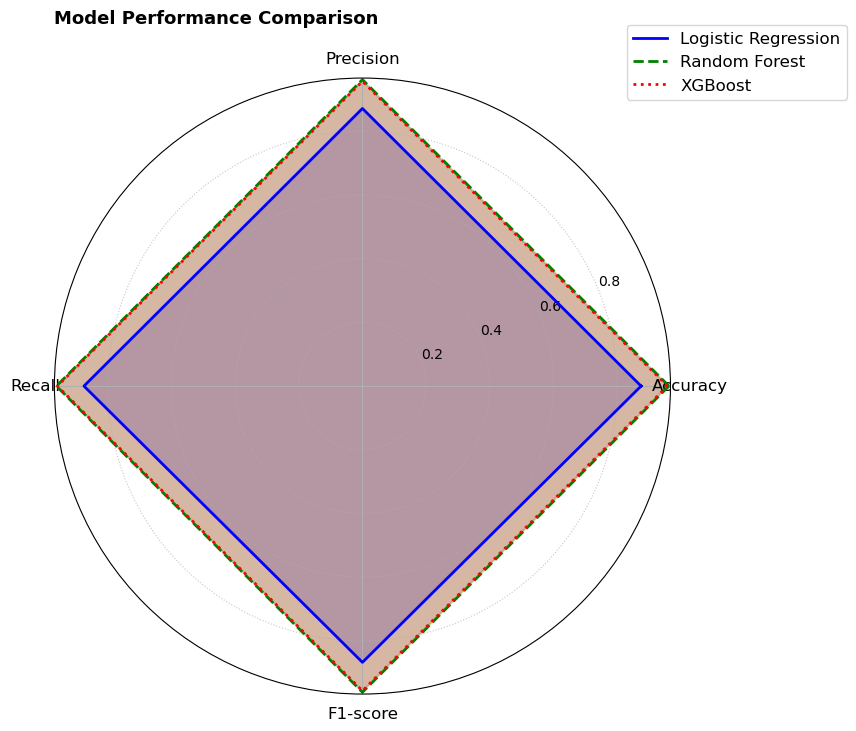

In [22]:
from math import pi

# Dictionary to store metrics for each model
model_metrics = {}

# Loop through each model
for name, model in models.items():
    y_pred = model.predict(X_test_1)  # Predict on test data
    report = classification_report(y_test, y_pred, output_dict=True)  # Classification report

    # Store metrics in the dictionary
    model_metrics[name] = [
        accuracy_score(y_test, y_pred),  # Accuracy
        np.mean([report[label]['precision'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]),  # Precision
        np.mean([report[label]['recall'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]),  # Recall
        np.mean([report[label]['f1-score'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']])  # F1-score
    ]

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate angles for each metric
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Create figure and polar subplot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colors and styles for each model
colors = ['b', 'g', 'r']
linestyles = ['solid', 'dashed', 'dotted']

# Plot data for each model
for (model, scores), color, linestyle in zip(model_metrics.items(), colors, linestyles):
    values = scores + scores[:1]  # Close the circular shape
    ax.plot(angles, values, label=model, linewidth=2, linestyle=linestyle, color=color)
    ax.fill(angles, values, color=color, alpha=0.2)  # Transparency to prevent excessive thickness

# Set axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)

# Add grid to assist readability
ax.yaxis.grid(True, linestyle="dotted", alpha=0.7)

# Add title
plt.title("Model Performance Comparison", fontsize=13, fontweight='bold', loc='left', pad=20)

# Position the legend outside the plot to prevent overlapping
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

# Save the image as PNG
plt.savefig("model_comparison.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# **INTERPRETATION**

This radar chart compares the performance of three machine learning models—**Logistic Regression, Random Forest, and XGBoost**—based on four key classification evaluation metrics:  

- **Accuracy**: How often the model makes correct predictions overall.  
- **Precision**: The proportion of correctly predicted positive instances out of all predicted positives.  
- **Recall**: The proportion of actual positive instances correctly identified by the model.  
- **F1-score**: The harmonic mean of precision and recall, providing a balance between the two.  

### **Analysis of Model Comparison**  
#### 1. **Overall Performance**  
From the radar chart, all models exhibit relatively high scores, approaching 1 in each metric, indicating that they all perform well on the given dataset.  

However, **XGBoost (red dashed line) and Random Forest (green dashed line) outperform Logistic Regression (solid blue line)** across all metrics.  

#### 2. **Model Comparisons**
- **Logistic Regression (solid blue line)**  
  - Performs slightly worse than the other two models, especially in precision, recall, and F1-score.  
  - This model is simpler and works well if the data has a linear relationship but may be less effective for more complex datasets.  

- **Random Forest (green dashed line)**  
  - Consistently scores higher than Logistic Regression across all metrics.  
  - As an ensemble model based on decision trees, Random Forest is more effective in handling complex data and reducing overfitting compared to linear models.  

- **XGBoost (red dashed line)**  
  - Shows the best performance among the three models, as seen in its slightly larger polygon.  
  - XGBoost is a gradient boosting model that is highly powerful and often delivers the best results in machine learning competitions.  
  - Its advantage is evident in its higher precision and recall, meaning it handles class imbalance better than both Random Forest and Logistic Regression.  

### **Conclusion**  
- If the goal is **interpretability**, **Logistic Regression** is a good choice because it is simpler and easier to understand.  
- If a **more accurate and robust model** is needed, **Random Forest** is a better choice than Logistic Regression.  
- If the **best-performing model** is required, **XGBoost is the optimal choice**, as it has the highest precision, recall, and F1-score.  

However, selecting the best model still depends on other factors, such as dataset size, computational resources, and the specific requirements of the problem at hand.



# **COMPARING Y TEST AND Y PREDICTION**

In [23]:
# Prediction using the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_1, y_train)
y_pred_xgb = xgb_model.predict(X_test_1)

# Displaying the prediction results
print("XGBoost Prediction Results:")
print(y_pred_xgb)

XGBoost Prediction Results:
[0 4 0 0 1 0 3 5 2 0 2 4 3 3 4 6 4 3 2 6 2 5 4 2 1 6 6 4 4 0 4 5 6 1 0 4 2
 1 1 1 1 3 1 1 5 0 3 1 2 3 1 1 1 5 0 6 3 3 5 3 1 4 6 0 2 2 1 4 0 0 6 6 0 0
 5 3 3 5 4 3 1 2 3 3 2 2 1 6 1 6 6 3 0 5 2 0 5 2 5 3 2 2 4 2 6 2 1 4 4 3 2
 1 2 1 0 2 2 3 6 1 4 3 2 6 1 3 2 2 4 3 4 3 1 2 6 4 0 4 1 2 5 6 0 0 1 3 2 4
 0 2 0 0 1 3 2 5 6 5 0 0 1 1 2 0 3 0 2 5 5 6 1 6 3 4 2 6 2 6 2 1 0 3 0 5 3
 2 5 4 3 3 0 4 0 1 4 1 3 2 4 0 3 3 4 4 1 4 5 5 2 4 5 2 0 2 3 0 5 3 3 2 4 5
 3 5 3 6 0 4 5 5 5 4 1 5 1 2 2 2 2 0 6 6 5 2 2 2 1 2 2 0 5 2 0 5 1 6 2 3 2
 5 4 4 5 2 2 4 4 1 1 4 3 4 6 2 3 2 3 4 3 0 0 5 6 4 4 5 2 6 0 3 2 5 0 2 0 5
 3 3 6 6 1 5 0 0 5 1 6 5 6 4 5 3 1 4 5 6 2 4 6 1 0 1 4 0 1 4 2 2 4 0 1 1 3
 4 2 5 2 0 0 0 2 4 6 2 4 3 5 2 5 6 6 4 6 1 0 6 6 6 5 6 6 3 2 2 3 4 2 6 5 4
 0 2 1 3 2 5 0 1 2 2 6 6 5 0 4 5 4 4 1 2 3 5 4 6 3 5 0 4 5 4 1 0 1 5 2 0 0
 4 1 4 6 5 5 5 4 0 5 2 5 3 1 3 6]


In [24]:
# Comparing prediction results with actual labels
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
df_combined = pd.concat([X_test, df_pred], axis=1)
df_combined

Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
544        0   20    1.76   53.70                               1     1  2.00   
1987       0   26    1.62  111.00                               1     1  3.00   
420        1   18    1.85   60.00                               1     1  3.00   
527        0   21    1.52   42.00                               0     1  3.00   
196        1   22    1.75   74.00                               1     0  2.00   
...      ...  ...     ...     ...                             ...   ...   ...   
447        1   19    1.80   87.00                               1     1  2.00   
1793       1   31    1.65  101.14                               1     1  2.91   
73         1   19    1.85   65.00                               1     0  2.00   
1711       1   29    1.76  113.50                               1     1  2.32   
1103       1   19    1.70   79.68                               1     0  2.74   

       NCP  CAEC  SMOKE  CH2O  SCC   FAF    TUE  CALC  MTRANS  Actual  \
544   3.89     1      0  1.86    0  2.87  2.000     3       3       0   
1987  3.00     2      0  2.70    0  0.00  0.323     2       3       4   
420   4.00     2      0  2.00    1  2.00  0.000     2       0       0   
527   1.00     1      0  1.00    0  0.00  0.000     2       3       0   
196   3.00     2      0  2.00    0  1.00  2.000     2       1       1   
...    ...   ...    ...   ...  ...   ...    ...   ...     ...     ...   
447   4.00     2      0  2.00    0  2.00  1.000     2       3       5   
1793  2.27     2      0  1.00    0  1.89  0.379     3       3       3   
73    3.00     2      0  3.00    0  2.00  1.000     2       1       1   
1711  3.00     2      0  2.16    0  0.00  1.465     2       0       3   
1103  2.16     2      0  1.09    0  0.11  0.004     3       3       6   

      Predicted  
544           0  
1987          4  
420           0  
527           0  
196           1  
...         ...  
447           5  
1793          3  
73            1  
1711          3  
1103          6  

[423 rows x 18 columns]

# **NUMBER OF Y PREDICTION VALUES THAT ARE NOT EQUAL TO Y TEST**

In [25]:
num_mismatches = (df_combined['Actual'] != df_combined['Predicted']).sum()
print(f"the number of data points that are not the same between y prediction and y test is: {num_mismatches}")

the number of data points that are not the same between y prediction and y test is: 18


# **SAVING FILE**

In [26]:
df_combined.reset_index(inplace=True)  # Reset index and make it a column
df_combined.rename(columns={'index': 'patient_ID'}, inplace=True)  # Rename the index column
df_combined.to_csv("predicted.csv", index=False)  # Save to CSV without the default index